### Why is missing data a problem?

- Affects distributions
  
- Less representative of the problem

- Can result in drawing incorrect insights

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

planes = pd.read_csv('datasets/planes.csv')

##### Strategies for addressing missing data
- Drop missing values if they are 5% or less of total values
- Impute mean, median, mode
  - Depends on distribution and context
- Impute by sub-group
  - for example: (Different experience levels have different median salary)

In [87]:
print(planes.isna().sum(), '\n')

threshold = len(planes) * 0.05
print(threshold)

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64 

533.0


In [88]:
# We filter out columns with missing values below the threshold
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


In [89]:
# We fill the missing values for the remaining columns, we will use the median of the column 
# group by the Airline column
airline_prices = planes.groupby("Airline")["Price"].median()

prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Additional_Info column is not useful for our analysis, we will drop it
planes.drop(columns= 'Additional_Info', inplace=True)

# Check for missing values
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


#### Finding the number of unique values, for categorical values

In [90]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for x in non_numeric.columns:    
    # Print the number of unique values
    print(f"Number of unique values in {x} column: ", non_numeric[x].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


#### Working with categorical data

In [91]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "^10h|^11h|^12h|^13h|^14h|^15h|^16h"

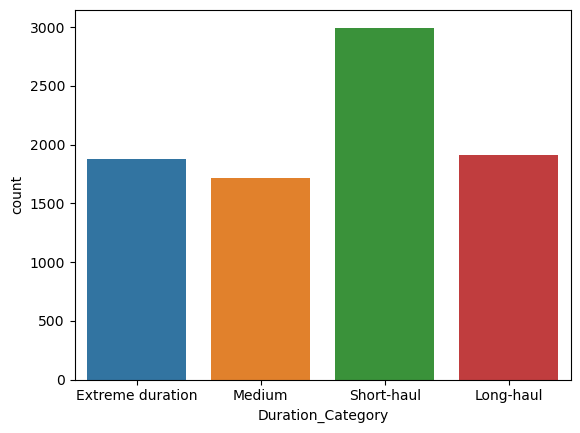

In [92]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

#### Working with numerical data

In [93]:
planes['Duration'] = planes['Duration'].str.replace('h', '').str.replace('m', '').str.replace(':', '').str.replace(' ', '')
planes['Duration'] = planes['Duration'].astype(float)

In [96]:
planes['Mean_Duration'] = planes.groupby('Airline')['Duration'].transform(lambda x: x.mean())
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Duration_Category,Mean_Duration
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.0,2 stops,13882.0,Extreme duration,1159.019792
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,525.0,1 stop,6218.0,Medium,390.338848
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,445.0,1 stop,13302.0,Short-haul,390.338848
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,225.0,non-stop,3873.0,Short-haul,267.444104
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,1530.0,1 stop,11087.0,Long-haul,1159.019792


#### Outliers

Outliers are observations far away from other data points  
    Median house => 500000 USD  
    Outlier house => 10000000 USD

Should consider why this value is so different